In [1]:
import matplotlib.font_manager as fm
from matplotlib import rc
path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [2]:
import pandas as pd
file_path = "./ref/경찰청범죄발생지역별통계_20231231.csv"
crime = pd.read_csv(file_path,encoding="EUC-KR")
crime.sample(3)

,범죄대분류,범죄중분류,서울종로구,서울중구,서울용산구,서울성동구,서울광진구,서울동대문구,서울중랑구,서울성북구,...,외국러시아,외국튀르키예,외국중국,외국일본,외국필리핀,외국베트남,외국태국,외국말레이시아,외국인도네시아,외국기타국가
27,풍속범죄,도박범죄,19,21,10,21,31,19,36,20,...,0,0,5,1,13,14,0,1,0,3
28,특별경제범죄,특별경제범죄,523,727,431,320,473,469,407,344,...,1,1,9,1,14,7,4,0,1,19
10,폭력범죄,폭행,905,1001,1018,548,842,839,913,731,...,0,0,3,2,2,3,0,0,1,9


In [3]:
crime = crime.loc[:, ~crime.columns.str.contains('외국')]
crime.sample(3)

,범죄대분류,범죄중분류,서울종로구,서울중구,서울용산구,서울성동구,서울광진구,서울동대문구,서울중랑구,서울성북구,...,경남창녕군,경남고성군,경남하동군,경남합천군,경남남해군,경남함양군,경남산청군,경남의령군,제주서귀포시,제주제주시
22,지능범죄,유가증권인지,0,2,0,0,1,3,0,1,...,0,0,0,0,0,0,0,0,1,0
31,환경범죄,환경범죄,1,0,1,1,0,1,1,0,...,32,12,8,9,16,6,4,17,16,13
10,폭력범죄,폭행,905,1001,1018,548,842,839,913,731,...,74,62,69,60,36,37,44,34,678,1983


In [4]:
crime_drop = crime.drop(columns=['범죄대분류','범죄중분류'])
crime_group = crime_drop.T.groupby(lambda x: x[:2]).sum().T

crime_data = pd.merge(crime[['범죄대분류']], crime_group, left_index=True,right_index=True)
data = crime_data.groupby(['범죄대분류']).sum()
data

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
범죄대분류,,,,,,,,,,,,,,,,,
강력범죄,725,5568,1239,1002,750,1126,735,1644,6232,118,503,1546,772,738,462,1007,711
교통범죄,8440,67645,15550,13343,8319,11112,6301,11557,30036,1268,5720,11398,11159,7611,4657,12667,8850
기타범죄,9628,60227,16399,11649,5293,9360,5718,23810,49158,1068,5810,19569,21570,10499,4658,12151,6091
노동범죄,21,172,1404,16,4,22,8,51,68,1,4,18,65,17,56,11,8
마약범죄,589,3064,1256,771,398,571,234,1589,3722,54,369,1008,459,233,111,513,476
병역범죄,221,2717,327,441,242,363,177,468,1514,36,117,652,245,222,158,461,183
보건범죄,353,2374,757,349,277,309,222,1616,2850,32,189,514,247,276,62,217,173
선거범죄,34,67,103,76,25,25,12,20,55,6,15,18,122,70,24,54,25
안보범죄,2,55,6,1,8,4,1,14,104,1,5,5,4,5,2,6,2


In [5]:
crime_sum = pd.DataFrame(data.sum(axis=0))
crime_sum.columns = ['범죄합계']
crime_sum

,범죄합계
강원,45654
경기,378380
경남,97000
경북,70426
광주,41969
대구,67044
대전,43366
부산,114070
서울,275974
세종,7637


<function matplotlib.pyplot.show(close=None, block=None)>

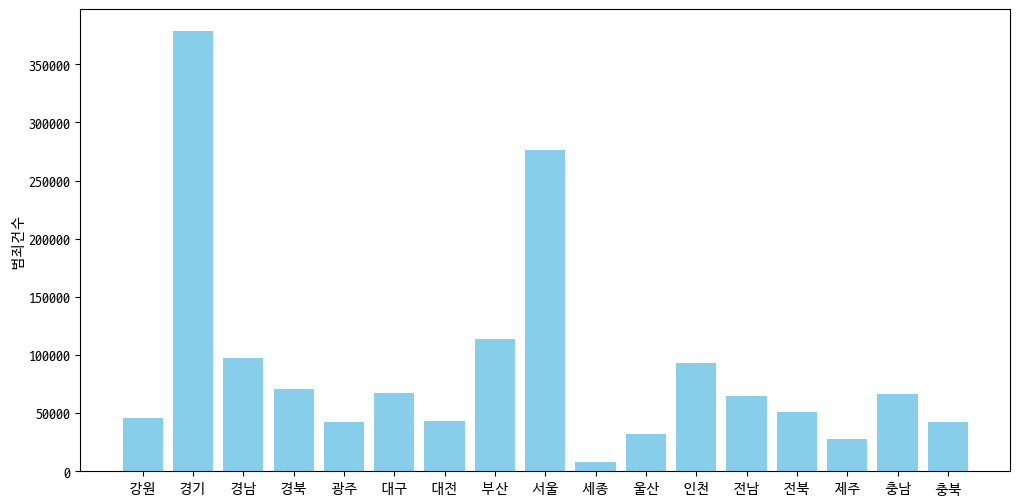

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(crime_sum.index, crime_sum['범죄합계'], color='skyblue')
plt.ylabel('범죄건수')
plt.show

In [12]:
Gyeonggi = pd.DataFrame(data['경기'])
Gyeonggi

,경기
범죄대분류,
강력범죄,5568
교통범죄,67645
기타범죄,60227
노동범죄,172
마약범죄,3064
병역범죄,2717
보건범죄,2374
선거범죄,67
안보범죄,55


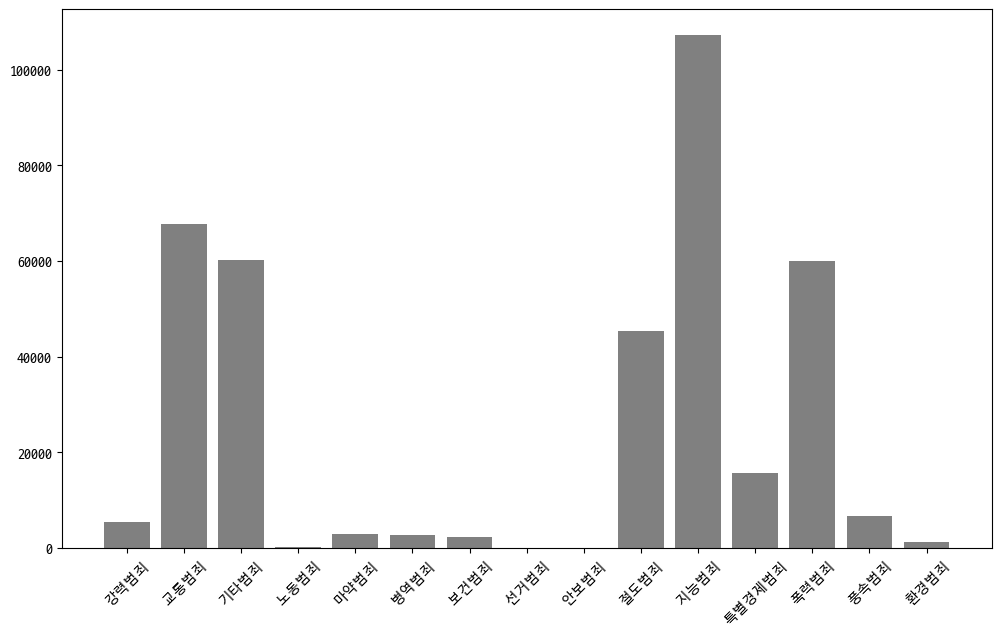

In [39]:
plt.figure(figsize=(12,7))
plt.bar(Gyeonggi.index, Gyeonggi['경기'],color='gray')
plt.xticks(rotation=45)
plt.show()

- 전국에서 범죄 건수가 가장 많은 곳은 경기 그 다음으로 서울이다.
- 가장 높은 경기의 데이터를 더 자세히 보면 지능 범죄와 교통범죄가 가장 많은 것을 볼 수 있다.